In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [5]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [6]:
df['Area Locality'].nunique()

2235

In [7]:
no_unique = []
for col in df.columns:
    uniq = df[col].nunique()
    no_unique.append(uniq)

In [8]:
no_unique

[81, 6, 243, 615, 480, 3, 2235, 6, 3, 3, 8, 3]

In [9]:
no_uniq_dict = dict(zip(df.columns, no_unique))

In [10]:
#Area locality has so many (2235) unique instances.
no_uniq_dict

{'Posted On': 81,
 'BHK': 6,
 'Rent': 243,
 'Size': 615,
 'Floor': 480,
 'Area Type': 3,
 'Area Locality': 2235,
 'City': 6,
 'Furnishing Status': 3,
 'Tenant Preferred': 3,
 'Bathroom': 8,
 'Point of Contact': 3}

In [11]:
#Checking null, to see if any data cleansing and feature engineering is required
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [12]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [13]:
df.tail(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [14]:
len(df)

4746

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<AxesSubplot:>

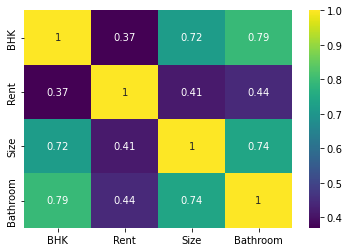

In [16]:
#Only the columns that are originally in numeric form
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [17]:
#Separate into string vs int. columns, later perform one hot encoding (not label encoding - which would imply ordinance) 
col_str=df.drop(['BHK',"Rent","Size","Bathroom"],axis=1)
col_int=df.drop(col_str.columns,axis=1)

#pd.get_dummies()

In [18]:
col_str.columns

Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')

In [19]:
col_int.columns

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

In [20]:
col_str_to_int = pd.get_dummies(col_str, drop_first=True)

In [21]:
col_str_to_int

,Posted On_2022-04-23,Posted On_2022-04-24,Posted On_2022-04-25,Posted On_2022-04-26,Posted On_2022-04-27,Posted On_2022-04-28,Posted On_2022-04-29,Posted On_2022-04-30,Posted On_2022-05-01,Posted On_2022-05-02,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
4742,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
4743,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4744,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [22]:
#After the one hot encoding is done, append with the integer columns to create fully numeric new df.
col_all_int = pd.concat([col_int,col_str_to_int],axis=1)

In [23]:
col_all_int

,BHK,Rent,Size,Bathroom,Posted On_2022-04-23,Posted On_2022-04-24,Posted On_2022-04-25,Posted On_2022-04-26,Posted On_2022-04-27,Posted On_2022-04-28,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
1,2,20000,800,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,2,17000,1000,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
3,2,10000,800,1,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
4,2,7500,850,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
4742,3,29000,2000,3,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
4743,3,35000,1750,3,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4744,3,45000,1500,2,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [24]:
#This took a long time around 10 minutes
cor = col_all_int.corr()
cor_target = abs(cor["Rent"])

In [25]:
relevant_cor = cor[cor_target>0.2]
relevant_cor = relevant_cor[relevant_cor.index]

In [26]:
#We can see, that here, Area type_Carpet Area and Area Type_Super Area are extremely highly correlated, so one of them should be dropped
#We also see, that BHK is highly correlated to Size and Bathroom. Could be dropped.
relevant_cor

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,Area Locality_Marathahalli,City_Mumbai,Point of Contact_Contact Owner
BHK,1.000000,0.369718,0.716145,0.794885,0.154675,-0.154079,-0.003273,0.023521,-0.230612
Rent,0.369718,1.000000,0.413551,0.441215,0.215769,-0.215499,0.283087,0.327038,-0.339521
Size,0.716145,0.413551,1.000000,0.740703,0.080422,-0.080130,0.005250,-0.049287,-0.214081
Bathroom,0.794885,0.441215,0.740703,1.000000,0.184219,-0.183770,-0.013434,0.184290,-0.327353
Area Type_Carpet Area,0.154675,0.215769,0.080422,0.184219,1.000000,-0.999157,0.020522,0.367084,-0.561252
Area Type_Super Area,-0.154079,-0.215499,-0.080130,-0.183770,-0.999157,1.000000,-0.020494,-0.366647,0.560656
Area Locality_Marathahalli,-0.003273,0.283087,0.005250,-0.013434,0.020522,-0.020494,1.000000,-0.016481,-0.019290
City_Mumbai,0.023521,0.327038,-0.049287,0.184290,0.367084,-0.366647,-0.016481,1.000000,-0.521292
Point of Contact_Contact Owner,-0.230612,-0.339521,-0.214081,-0.327353,-0.561252,0.560656,-0.019290,-0.521292,1.000000


In [27]:
#Drop the column due to aforementioned reason
relevant_cor = relevant_cor.drop(["Area Type_Carpet Area"], axis=1)

In [28]:
relevant_cor.columns

Index(['BHK', 'Rent', 'Size', 'Bathroom', 'Area Type_Super Area',
       'Area Locality_Marathahalli', 'City_Mumbai',
       'Point of Contact_Contact Owner'],
      dtype='object')

In [29]:
col_int

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1
...,...,...,...,...
4741,2,15000,1000,2
4742,3,29000,2000,3
4743,3,35000,1750,3
4744,3,45000,1500,2


In [30]:
col_int_final = col_all_int[relevant_cor.columns]

In [31]:
#Finally, the basic feature engineering is done. However, outliers need to be removed.

<AxesSubplot:xlabel='Size', ylabel='Rent'>

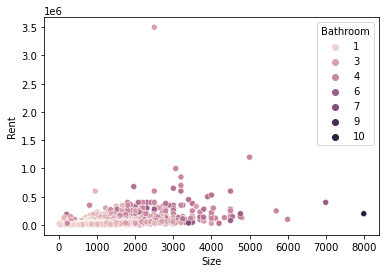

In [32]:
#Outliers exist. Let's remove by Quartile method.
sns.scatterplot(data=df, x="Size",y="Rent",hue="Bathroom")

In [33]:
col_int_final

,BHK,Rent,Size,Bathroom,Area Type_Super Area,Area Locality_Marathahalli,City_Mumbai,Point of Contact_Contact Owner
0,2,10000,1100,2,1,0,0,1
1,2,20000,800,1,1,0,0,1
2,2,17000,1000,1,1,0,0,1
3,2,10000,800,1,1,0,0,1
4,2,7500,850,1,0,0,0,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,0,0,0,1
4742,3,29000,2000,3,1,0,0,1
4743,3,35000,1750,3,0,0,0,0
4744,3,45000,1500,2,0,0,0,0


In [34]:
# I could probably spot the outliers visually for size, size > 5000. But decided to just use IQR method
# 600000 was just decided visually. col_int_final['Rent']<600000
for x in ['Size']:
    q75,q25 = np.percentile(col_int_final.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max_val = q75+(1.5*intr_qr)
    min_val = q25-(1.5*intr_qr)

In [35]:
col_int_final = col_int_final[(col_int_final['Size']>min_val) & (col_int_final['Size']<max_val) & (col_int_final['Rent']<600000)]

<AxesSubplot:xlabel='Size', ylabel='Rent'>

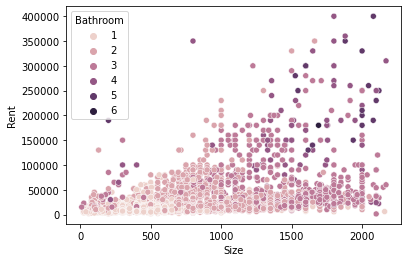

In [36]:
sns.scatterplot(data=col_int_final, x="Size",y="Rent",hue="Bathroom")

<AxesSubplot:xlabel='Bathroom', ylabel='count'>

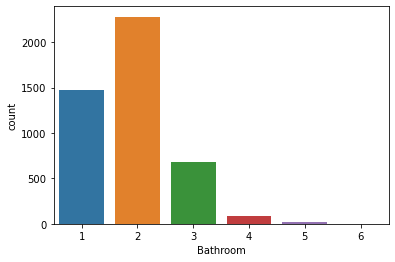

In [37]:
sns.countplot(data=col_int_final, x="Bathroom")

<AxesSubplot:xlabel='Rent', ylabel='Count'>

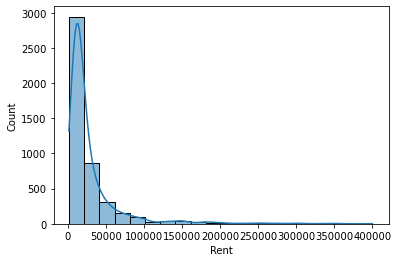

In [38]:
sns.histplot(data=col_int_final, x="Rent",binwidth=20000, kde=True)

In [39]:
X = col_int_final.drop("Rent", axis=1)
y = col_int_final['Rent']

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
#Just pull out the tuple unpacking from the documentation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
print(len(X_train), len(X_test))

3178 1363


In [43]:
#Scaler is mandatory for essentially all algorithms using some distance metrics. In this case, I will use several algorithms some of which (SVR) deploy distance metrics
scaler = StandardScaler()

In [44]:
#X_train -> both fit and transform
#X_test -> transform only, since we don't want the model later on to 'know' anything about test dataset
#y or label is never scaled, you just leave it as it is. If you alter the label even in continious scenario, you are altering the output. Independent features are scaled due to varying units and magnitudes
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [111]:
# For some models, no random state seems to be available
r1 = LinearRegression()
r2 = Lasso(random_state=42)
r3 = Ridge(random_state=42)
r4 = ElasticNet(random_state=42)
r5 = RandomForestRegressor(random_state=42)
r6 = SVR()

In [112]:
# Each model has its own set of hyperparameters to be tuned, specify them here for performing GridsearchCV to find optimal values.
# Make a pipeline to assemble the steps.
#param1 = {}

#Ref
#https://stackoverflow.com/questions/23045318/grid-search-over-multiple-classifiers

#Actually, Lasso and Ridge could have been skipped since ElasticNet takes both into account...


param2 = {"classifier__alpha":[0.001,0.01,0.1,1,10,50]}
param3 = {"classifier__alpha":[0.001,0.01,0.1,1,10,50]}
param4 = {"classifier__alpha":[0.001,0.01,0.1,1,10,50],
         "classifier__l1_ratio":[0.01,0.1,0.2,0.5,0.7,1]}
param5 = {"classifier__n_estimators":[50,100,250],
         "classifier__max_depth":[5,20,50]}
param6 = {"classifier__kernel":['linear', 'poly', 'rbf'],
        "classifier__C":[0.1,0.2,0.5,1,5]
}

In [115]:
pipeline2 = Pipeline([('classifier',r2)])
pipeline3 = Pipeline([('classifier',r3)])
pipeline4 = Pipeline([('classifier',r4)])
pipeline5 = Pipeline([('classifier',r5)])
pipeline6 = Pipeline([('classifier',r6)])

params = [param2,param3, param4, param5, param6]
pipelines = [pipeline2, pipeline3, pipeline4, pipeline5, pipeline6]

#pipeline = make_pipeline(r2)

In [152]:
#Make a loop for performing gridsearch over each set of pipeline and the associated parameters

estimators = []
best_pars = []
for i in range(len(params)):
        gs = GridSearchCV(pipelines[i], params[i], verbose=2, refit=False, n_jobs=-1, scoring='neg_mean_absolute_error')
        gs = gs.fit(X_train, y_train)
        estimators.append(gs.estimator)
        best_pars.append(gs.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....classifier__alpha=10, classifier__l1_ratio=0.01; total time=   0.0s
[CV] END .....classifier__alpha=10, classifier__l1_ratio=0.1; total time=   0.0s
[CV] END .....classifier__alpha=10, classifier__l1_ratio=0.1; total time=   0.0s
[CV] END .....classifier__alpha=10, classifier__l1_ratio=0.1; total time=   0.0s
[CV] END .....classifier__alpha=10, classifier__l1_ratio=0.1; total time=   0.0s
[CV] END .....classifier__alpha=10, classifier__l1_ratio=0.1; total time=   0.0s
[CV] END .....classifier__alpha=10, classifier__l1_ratio=0.2; total time=   0.0s
[CV] END .....classifier__alpha=10, classifier__l1_ratio=0.2; total time=   0.0s
[CV] END .......classifier__alpha=10, classifier__l1_ratio=1; total time=   0.0s
[CV] END .......classifier__alpha=10, classifier__l1_ratio=1; total time=   0.0s
[CV] END ....classifier__alpha=50, classifier__l1_ratio=0.01; total time=   0.0s
[CV] END ....classifier__alpha=50, classifier__l1

[CV] END .....classifier__alpha=50, classifier__l1_ratio=0.5; total time=   0.0s
[CV] END .....classifier__alpha=50, classifier__l1_ratio=0.5; total time=   0.0s
[CV] END .....classifier__alpha=50, classifier__l1_ratio=0.5; total time=   0.0s
[CV] END .....classifier__alpha=50, classifier__l1_ratio=0.5; total time=   0.0s
[CV] END .....classifier__alpha=50, classifier__l1_ratio=0.7; total time=   0.0s
[CV] END .....classifier__alpha=50, classifier__l1_ratio=0.7; total time=   0.0s
[CV] END .....classifier__alpha=50, classifier__l1_ratio=0.7; total time=   0.0s
[CV] END .....classifier__alpha=50, classifier__l1_ratio=0.7; total time=   0.0s
[CV] END .....classifier__alpha=50, classifier__l1_ratio=0.7; total time=   0.0s
[CV] END .......classifier__alpha=50, classifier__l1_ratio=1; total time=   0.0s
[CV] END .......classifier__alpha=50, classifier__l1_ratio=1; total time=   0.0s
[CV] END .......classifier__alpha=50, classifier__l1_ratio=1; total time=   0.0s
[CV] END .......classifier__

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .............................classifier__alpha=0.01; total time=   0.0s
[CV] END .............................classifier__alpha=0.01; total time=   0.0s
[CV] END ..............................classifier__alpha=0.1; total time=   0.0s
[CV] END ..............................classifier__alpha=0.1; total time=   0.0s
[CV] END ................................classifier__alpha=1; total time=   0.0s
[CV] END ................................classifier__alpha=1; total time=   0.0s
[CV] END ................................classifier__alpha=1; total time=   0.0s
[CV] END ................................classifier__alpha=1; total time=   0.0s
[CV] END ...............................classifier__alpha=10; total time=   0.0s
[CV] END ...............................classifier__alpha=50; total time=   0.0s
[CV] END ...............................classifier__alpha=50; total time=   0.0s
[CV] END ...............................classif

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [156]:
best_estimators_dict = dict(zip(estimators, best_pars))

In [157]:
best_estimators_dict

{Pipeline(steps=[('classifier', Lasso(random_state=42))]): {'classifier__alpha': 50},
 Pipeline(steps=[('classifier', Ridge(random_state=42))]): {'classifier__alpha': 50},
 Pipeline(steps=[('classifier', ElasticNet(random_state=42))]): {'classifier__alpha': 1,
  'classifier__l1_ratio': 0.01},
 Pipeline(steps=[('classifier', RandomForestRegressor(random_state=42))]): {'classifier__max_depth': 5,
  'classifier__n_estimators': 250},
 Pipeline(steps=[('classifier', SVR())]): {'classifier__C': 5,
  'classifier__kernel': 'linear'}}

In [131]:
#For SVR, the best parameters are: {'classifier__C': 5, 'classifier__kernel': 'linear'}
    svr_model = SVR(C=5, kernel='linear')
    svr_model.fit(X_train,y_train)
    y_pred = svr_model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)

In [132]:
RMSE

33833.66205529009

In [133]:
MAE

13603.332555272347

In [134]:
#Min, mean and avg of house price
print(col_all_int['Rent'].min(),col_all_int['Rent'].mean(),col_all_int['Rent'].max())

1200 34993.45132743363 3500000


In [144]:
# Compare the performance of models with default parameters.
models = [r1,r2,r3,r4,r5,r6]
RMSEs = []
MAEs = []

for i in range(len(models)):
    models[i].fit(X_train,y_train)
    model_pred = models[i].predict(X_test)
    RMSE_model = np.sqrt(mean_squared_error(y_test, model_pred))
    MAE_model = mean_absolute_error(y_test, model_pred)
    RMSEs.append(RMSE_model)
    MAEs.append(MAE_model)

In [153]:
performance_dict_default = dict(zip(RMSEs, MAEs))

In [155]:
performance_dict_default

{25349.78912854374: 14818.132601420346,
 25349.830352068726: 14817.589229936624,
 25350.27187798159: 14816.904200501442,
 26619.14485451283: 13959.084310040369,
 19918.972938740222: 9563.653780135188,
 42109.66753739631: 19045.105822084868}

In [160]:
r2_optimal = Lasso(alpha=50)
r3_optimal = Ridge(alpha=50)
r4_optimal = ElasticNet(alpha=1,l1_ratio=0.01)
r5_optimal = RandomForestRegressor(n_estimators=250,max_depth=5)
r6_optimal = SVR(C=5,kernel='linear')

models_optimal = [r2_optimal,r3_optimal,r4_optimal,r5_optimal,r6_optimal]
RMSEs_optimal = []
MAEs_optimal = []

for i in range(len(models_optimal)):
    models_optimal[i].fit(X_train,y_train)
    model_optimal_pred = models_optimal[i].predict(X_test)
    RMSE_model_optimal = np.sqrt(mean_squared_error(y_test, model_optimal_pred))
    MAE_model_optimal = mean_absolute_error(y_test, model_optimal_pred)
    RMSEs_optimal.append(RMSE_model_optimal)
    MAEs_optimal.append(MAE_model_optimal)

In [161]:
performance_dict_optimal = dict(zip(RMSEs_optimal, MAEs_optimal))

In [162]:
performance_dict_optimal

{25352.225562835207: 14791.046071822848,
 25375.20351725597: 14758.422412932763,
 27918.925489661193: 13885.710717184673,
 18109.665382740663: 8969.480009992518,
 33833.66205529009: 13603.332555272347}

In [163]:
#Conclusion. Random Forest Regressor with n_estimators=250,max_depth=5 performs the best in both RMSE and MAE.

In [164]:
# Now that Random Forest Regressor has been chose, fit to whole dataset
rfregressor = RandomForestRegressor(n_estimators=250,max_depth=5)
rfregressor.fit(X, y)

RandomForestRegressor(max_depth=5, n_estimators=250)

In [165]:
import joblib

In [166]:
joblib.dump(rfregressor, "rfregressor_optimal")

['rfregressor_optimal']

In [167]:
#Later load with this 
#joblib.load("rfregressor_optimal")